In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib.image import imread

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

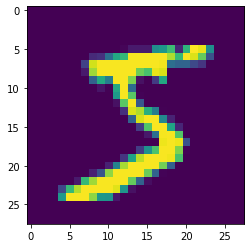

In [7]:
plt.imshow(x_train[0])

## Scaling

In [10]:
x_train = x_train/255

In [11]:
x_test = x_test/255

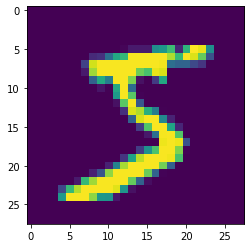

In [12]:
plt.imshow(x_train[0])

# One hot encoding labelse

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train_cat = to_categorical(y_train)

In [16]:
y_test_cat = to_categorical(y_test)

In [17]:
y_test_cat.shape

(10000, 10)

In [18]:
y_train_cat.shape

(60000, 10)

### Resaping 
- For out model to resocnize the color chalnnel

In [19]:
x_train.shape

(60000, 28, 28)

In [21]:
x_test.shape

(10000, 28, 28)

In [23]:
x_test = x_test.reshape(10000,28,28,1)

In [24]:
x_train = x_train.reshape(60000,28,28,1)

In [25]:
x_test.shape 

(10000, 28, 28, 1)

In [26]:
x_train.shape

(60000, 28, 28, 1)

## model 

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
stop = EarlyStopping(monitor="val_loss", mode = "min", patience=3)

In [33]:
28 * 28

784

In [35]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (2,2), strides = (1,1),
                input_shape = (28,28,1), padding = "valid", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 300, activation = "relu"))
model.add(Dense(units = 10, activation = "softmax"))
model.compile(loss="categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

## fitting

In [36]:
model.fit(x_train, y_train_cat, validation_data=(x_test,y_test_cat), epochs=20, callbacks=[stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 311s 5ms/sample - loss: 0.1398 - accuracy: 0.9581 - val_loss: 0.0588 - val_accuracy: 0.9801
Epoch 2/20
60000/60000 [==============================] - 286s 5ms/sample - loss: 0.0491 - accuracy: 0.9850 - val_loss: 0.0557 - val_accuracy: 0.9829
Epoch 3/20
60000/60000 [==============================] - 287s 5ms/sample - loss: 0.0271 - accuracy: 0.9916 - val_loss: 0.0477 - val_accuracy: 0.9856
Epoch 4/20
60000/60000 [==============================] - 284s 5ms/sample - loss: 0.0177 - accuracy: 0.9941 - val_loss: 0.0534 - val_accuracy: 0.9828
Epoch 5/20
60000/60000 [==============================] - 282s 5ms/sample - loss: 0.0119 - accuracy: 0.9960 - val_loss: 0.0557 - val_accuracy: 0.9838
Epoch 6/20
60000/60000 [==============================] - 284s 5ms/sample - loss: 0.0091 - accuracy: 0.9966 - val_loss: 0.0650 - val_accuracy: 0.9833


In [37]:
metrics = pd.DataFrame(model.history.history)

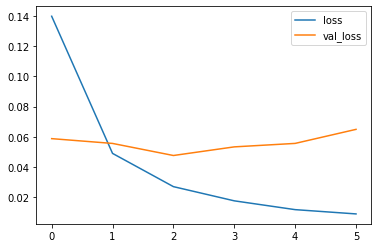

In [40]:
metrics[["loss","val_loss"]].plot()

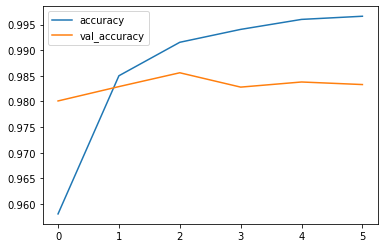

In [42]:
metrics[["accuracy", "val_accuracy"]].plot()

## model Performance

In [44]:
predictions = model.predict_classes(x_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Testing Predictions

In [46]:
from random import randint
random_index = randint(1, len(x_train))
random_image = x_train[random_index]

In [50]:
model.predict_classes(random_image.reshape(1,28,28,1))

array([2])

In [51]:
model.save("mnint.h5")